In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest




In [3]:
file_path = "adult_with_headers.csv"
df = pd.read_csv(file_path)

df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print("Dataset Shape:", df.shape)

# Data types
print("\nData Types:")
print(df.dtypes)


Dataset Shape: (32561, 15)

Data Types:
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [7]:
print("\nTarget Variable Distribution:")
print(df['income'].value_counts())


Target Variable Distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [8]:
df = df.replace("?", np.nan)

print("\nMissing Values After Replacement:")
print(df.isnull().sum())

df = df.dropna()

print("\nDataset Shape After Dropping Missing Values:", df.shape)


Missing Values After Replacement:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Dataset Shape After Dropping Missing Values: (32561, 15)


In [9]:

numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
print("Numeric Features:", list(numeric_features))

# Standard Scaling
scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard[numeric_features] = scaler_standard.fit_transform(df_standard[numeric_features])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_features] = scaler_minmax.fit_transform(df_minmax[numeric_features])

# Preview results
print("\nOriginal Data (first 5 rows):")
print(df[numeric_features].head())

print("\nStandard Scaled Data (first 5 rows):")
print(df_standard[numeric_features].head())

print("\nMin-Max Scaled Data (first 5 rows):")
print(df_minmax[numeric_features].head())


Numeric Features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Original Data (first 5 rows):
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

Standard Scaled Data (first 5 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.

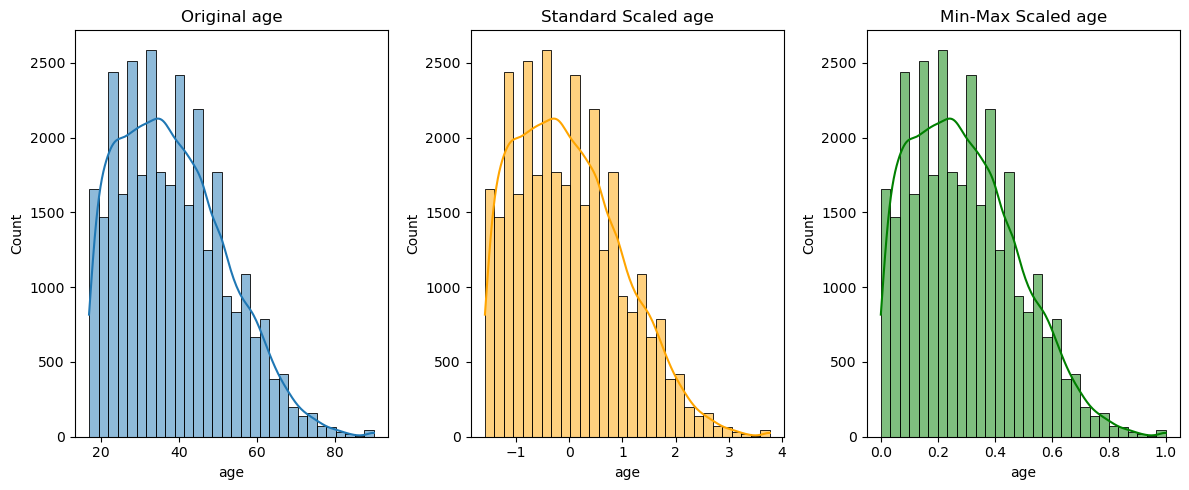

In [10]:
feature = "age"   

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.histplot(df[feature], kde=True, bins=30)
plt.title(f"Original {feature}")

plt.subplot(1,3,2)
sns.histplot(df_standard[feature], kde=True, bins=30, color="orange")
plt.title(f"Standard Scaled {feature}")

plt.subplot(1,3,3)
sns.histplot(df_minmax[feature], kde=True, bins=30, color="green")
plt.title(f"Min-Max Scaled {feature}")

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include=["object"]).columns
print("Categorical Features:", list(categorical_features))


Categorical Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [12]:
low_cardinality = [col for col in categorical_features if df[col].nunique() <= 5]
high_cardinality = [col for col in categorical_features if df[col].nunique() > 5]

print("\nLow-cardinality categorical features (<=5 unique values):", low_cardinality)
print("High-cardinality categorical features (>5 unique values):", high_cardinality)



Low-cardinality categorical features (<=5 unique values): ['race', 'sex', 'income']
High-cardinality categorical features (>5 unique values): ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


In [13]:
df_encoded = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

# --- Label Encoding for high cardinality ---
le = LabelEncoder()
for col in high_cardinality:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("\nEncoded Dataset (first 5 rows):")
df_encoded.head()


Encoded Dataset (first 5 rows):


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,40,39,False,False,False,True,True,False
1,50,6,83311,9,13,2,4,0,0,0,13,39,False,False,False,True,True,False
2,38,4,215646,11,9,0,6,1,0,0,40,39,False,False,False,True,True,False
3,53,4,234721,1,7,2,6,0,0,0,40,39,False,True,False,False,True,False
4,28,4,338409,9,13,2,10,5,0,0,40,5,False,True,False,False,False,False


In [14]:
df = df.replace("?", np.nan)

# Check again
print("\nMissing values after replacing '?':")
print(df.isnull().sum())


Missing values after replacing '?':
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [17]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum().sum())  


Missing values after imputation:
0


In [18]:
numeric_cols = df.select_dtypes(include=np.number).columns
print("\nNumeric Columns:", list(numeric_cols))

scaler_std = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_std.fit_transform(df[numeric_cols]),
                                  columns=numeric_cols)

scaler_mm = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_mm.fit_transform(df[numeric_cols]),
                                columns=numeric_cols)

print("\nStandard Scaled Sample:")
display(df_standard_scaled.head())

print("\nMin-Max Scaled Sample:")
display(df_minmax_scaled.head())


Numeric Columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Standard Scaled Sample:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429



Min-Max Scaled Sample:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [19]:
categorical_cols = df.select_dtypes(include="object").columns
print("Categorical columns:", list(categorical_cols))


ohe_cols = [col for col in categorical_cols if df[col].nunique() <= 5]
label_cols = [col for col in categorical_cols if df[col].nunique() > 5]

print("\nColumns for One-Hot Encoding (<=5 categories):", ohe_cols)
print("Columns for Label Encoding (>5 categories):", label_cols)

Categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

Columns for One-Hot Encoding (<=5 categories): ['race', 'sex', 'income']
Columns for Label Encoding (>5 categories): ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


In [20]:
df_ohe = pd.get_dummies(df[ohe_cols], drop_first=True)

In [21]:
label_encoders = {}
df_label = df[label_cols].copy()
for col in label_cols:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col])
    label_encoders[col] = le 

In [22]:
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), df_ohe, df_label], axis=1)

print("\nEncoded Dataset Sample:")
display(df_encoded.head())
print("\nFinal shape:", df_encoded.shape)


Encoded Dataset Sample:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country
0,39,77516,13,2174,0,40,False,False,False,True,True,False,7,9,4,1,1,39
1,50,83311,13,0,0,13,False,False,False,True,True,False,6,9,2,4,0,39
2,38,215646,9,0,0,40,False,False,False,True,True,False,4,11,0,6,1,39
3,53,234721,7,0,0,40,False,True,False,False,True,False,4,1,2,6,0,39
4,28,338409,13,0,0,40,False,True,False,False,False,False,4,9,2,10,5,5



Final shape: (32561, 18)


In [23]:
df_fe = df_encoded.copy()
df_fe["age_group"] = pd.cut(df["age"],
                            bins=[16, 25, 35, 50, 65, 90],
                            labels=["Young", "EarlyCareer", "MidCareer", "Senior", "Retired"])

In [24]:
df_fe = pd.concat([df_fe, pd.get_dummies(df_fe["age_group"], prefix="agegrp", drop_first=True)], axis=1)
df_fe.drop("age_group", axis=1, inplace=True)

In [25]:
df_fe["capital_net"] = df["capital_gain"] - df["capital_loss"]

In [26]:
skew_vals = df[numeric_cols].skew().sort_values(ascending=False)
print("\nSkewness of numerical features:")
print(skew_vals)


Skewness of numerical features:
capital_gain      11.953848
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64


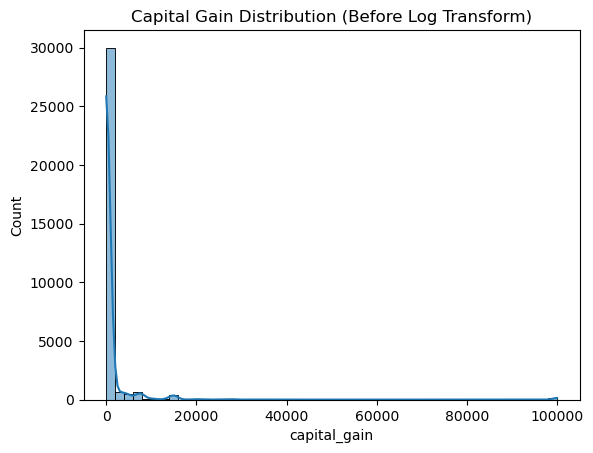

In [27]:
sns.histplot(df["capital_gain"], bins=50, kde=True)
plt.title("Capital Gain Distribution (Before Log Transform)")
plt.show()

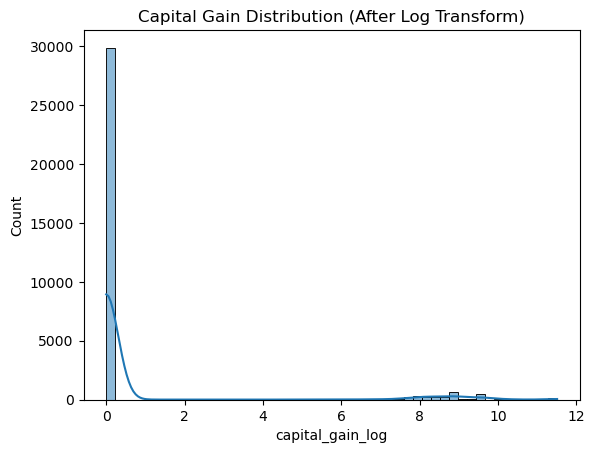

In [28]:
df_fe["capital_gain_log"] = np.log1p(df["capital_gain"])

sns.histplot(df_fe["capital_gain_log"], bins=50, kde=True)
plt.title("Capital Gain Distribution (After Log Transform)")
plt.show()

In [29]:
print("\nTransformed dataset shape:", df_fe.shape)
display(df_fe.head())


Transformed dataset shape: (32561, 24)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,...,marital_status,occupation,relationship,native_country,agegrp_EarlyCareer,agegrp_MidCareer,agegrp_Senior,agegrp_Retired,capital_net,capital_gain_log
0,39,77516,13,2174,0,40,False,False,False,True,...,4,1,1,39,False,True,False,False,2174,7.684784
1,50,83311,13,0,0,13,False,False,False,True,...,2,4,0,39,False,True,False,False,0,0.000000
2,38,215646,9,0,0,40,False,False,False,True,...,0,6,1,39,False,True,False,False,0,0.000000
3,53,234721,7,0,0,40,False,True,False,False,...,2,6,0,39,False,False,True,False,0,0.000000
4,28,338409,13,0,0,40,False,True,False,False,...,2,10,5,5,True,False,False,False,0,0.000000


In [32]:
num_data = df_fe.select_dtypes(include=np.number)


iso = IsolationForest(contamination=0.02, random_state=42)  # ~2% outliers
outlier_pred = iso.fit_predict(num_data)


In [33]:
df_fe["outlier"] = outlier_pred
print("\nOutliers detected:", (df_fe["outlier"] == -1).sum())

# Remove outliers
df_clean = df_fe[df_fe["outlier"] == 1].drop("outlier", axis=1)
print("Dataset shape after outlier removal:", df_clean.shape)


Outliers detected: 652
Dataset shape after outlier removal: (31909, 24)


In [34]:
print(df_clean.columns.tolist())

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White', 'sex_ Male', 'income_ >50K', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country', 'agegrp_EarlyCareer', 'agegrp_MidCareer', 'agegrp_Senior', 'agegrp_Retired', 'capital_net', 'capital_gain_log']


In [35]:
from sklearn.feature_selection import mutual_info_classif

# Define target properly
target = "income_ >50K"
X = df_clean.drop(columns=[target])
y = df_clean[target]

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Put results into a DataFrame
mi_df = pd.DataFrame({"Feature": X.columns, "MutualInfo": mi_scores})
mi_df = mi_df.sort_values(by="MutualInfo", ascending=False)

print("\nMutual Information Scores (Top 15):")
display(mi_df.head(15))


Mutual Information Scores (Top 15):


,Feature,MutualInfo
15,relationship,0.118345
13,marital_status,0.113575
21,capital_net,0.099650
0,age,0.067210
22,capital_gain_log,0.062894
14,occupation,0.062800
3,capital_gain,0.062546
2,education_num,0.061611
12,education,0.058453
5,hours_per_week,0.038798


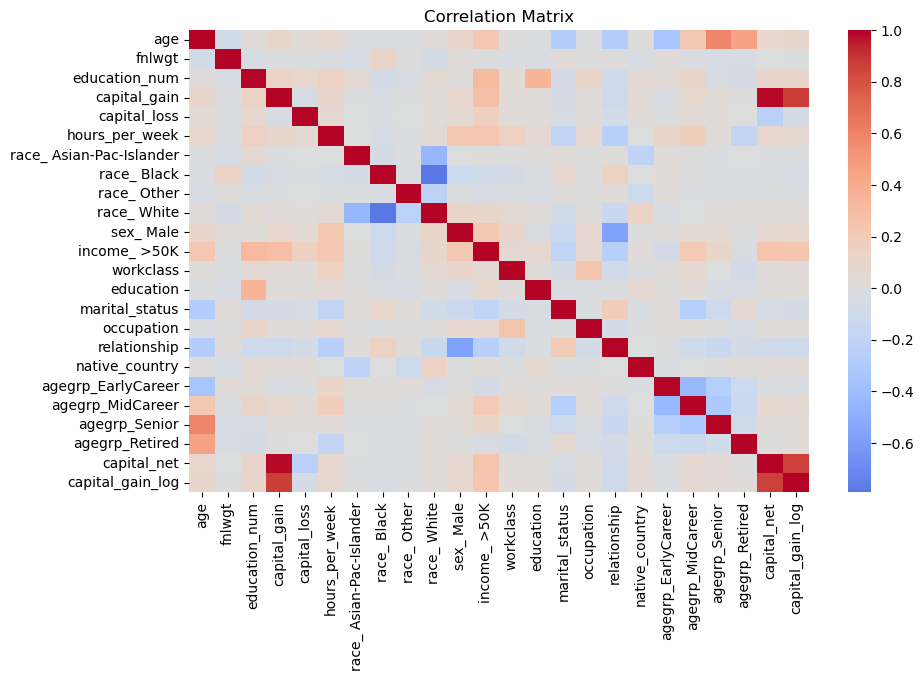

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()